In [4]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az
import numpy as np

In [128]:
# getting the pandas dataframe from the csv file

df = pd.read_csv(r'prices.csv')
print(df)

     Price  Speed  HardDrive  Ram Premium
0     1499     66        540    8     yes
1     2190     33        426    8     yes
2     2745     66       1600   24     yes
3     2744     50        420    8     yes
4     1849     33        212    4      no
..     ...    ...        ...  ...     ...
495   1790     66        730    8     yes
496   2295     33        245    8     yes
497   1690     33        107    2     yes
498   2154     66       1000   16     yes
499   2090     66        214    4     yes

[500 rows x 5 columns]


In [129]:
# we will extract x1 as being "Speed" and x2 as being ln("Ram")

# getting ln of ram
df['HardDrive'] = np.log(df['HardDrive'])

X = df[["Speed", "HardDrive"]].to_numpy()
# print(X)
# we obtain the mean for x1 and x2 respectively
X_mean = np.mean(X, axis=0, keepdims=True)
print(X_mean)
X_centered = np.subtract(X, X_mean)
# print(X_centered)

[[52.004     5.877261]]


In [130]:
# now we will get y as a numpy array
y = df["Price"].to_numpy()
print(y)

[1499 2190 2745 2744 1849 2989 2595 2744 2799 2565 1599 2144 2794 1995
 2609 2444 2790 2595 2344 1290 2195 2444 2444 1940 3344 1890 1899 2390
 3695 1999 2995 3299 2159 2804 2723 2895 1904 2590 1559 2344 1999 2190
 2294 1890 1540 1999 2844 2769 2069 1288 1590 1788 2559 2575 2149 1599
 1490 2699 3015 2190 2059 2290 1995 2499 2344 2520 2120 1695 1790 1399
 2999 3044 1990 2290 2465 2225 2690 2490 2899 2795 1395 1295 2095 2090
 2099 1490 3144 1490 1295 2795 2545 2149 1990 3090 2140 2854 2944 1689
 2473 1279 1399 1295 2690 2594 3048 1354 2623 2145 2690 1398 1489 1995
 2079 1599 1723 2995 4195 1854 1795 2240 3148 2094 2443 1599 1395 2390
 3094 2935 1690 2095 2744 2849 2344 2844 1398 2625 2328 3149 2643 2690
 1795 2220 2075 1520 2165 1999 2040 1440 2775 1544 2744 2575 3044 2390
 1844 1995 2705 2490 1890 1299 2390 1299 3140 1548 1499 2590 2395 2295
 2145 3048 1945 1989 2745 3090 1795 2108 2099 2220 1994 2204 2999 1268
 3144 2795 1740 1709 2444 1973 1799 2545 1699 1844 2744 2345 2374 1744
 1790 

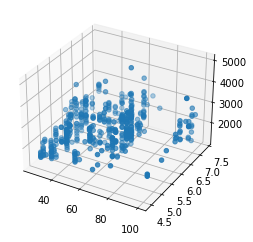

In [131]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df['Speed'], df['HardDrive'], df['Price'])
plt.show()

In [139]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ε = pm.HalfCauchy('ε', 5)
    μ = α_tmp + pm.math.dot(X_centered, β)
    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y)
    idata_mlr = pm.sample(1000, return_inferencedata=True, init='map')

Auto-assigning NUTS sampler...
Initializing NUTS using map...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α_tmp]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
